# Market Basket Analysis in Python using Apriori Algorithm

For the given project, which involves market basket analysis and association rule mining, the most suitable algorithm is the Apriori algorithm. The Apriori algorithm is a classic and widely used algorithm for association rule mining in transactional databases.

Justification for choosing the Apriori algorithm:

1. Association Rule Mining: The Apriori algorithm is specifically designed for mining frequent itemsets and generating association rules from transactional data. In this project, we are interested in finding associations between items frequently purchased together, and Apriori serves this purpose well.

2. Handling Large Datasets: Apriori efficiently handles large datasets, which is crucial in market basket analysis as transactional data can have thousands of transactions and numerous unique items.

3. Support and Confidence: Apriori provides measures such as support and confidence to quantify the significance of the association rules. Support measures the frequency of an itemset, while confidence measures the likelihood of the consequent item given the antecedent itemset.

4. Scalability: The Apriori algorithm is scalable and can be parallelized to handle more extensive datasets efficiently.

5. Pruning: Apriori uses the "apriori property" to prune the search space and avoid unnecessary itemset combinations, making it computationally efficient.

6. Interpretability: Association rules generated by Apriori are easy to interpret, making it suitable for business applications, such as understanding customer behavior and optimizing product placements.

In summary, the Apriori algorithm is well-suited for market basket analysis and association rule mining due to its efficiency, scalability, and interpretability. It can handle large transactional datasets and provide valuable insights into item associations, allowing businesses to make data-driven decisions for marketing, inventory management, and customer retention strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apyori import apriori
from collections import Counter

In [2]:
df = pd.read_csv(r"C:\Users\UTKARSH SINGH\Downloads\basket analysis\Market_Basket_Optimisation.csv", header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


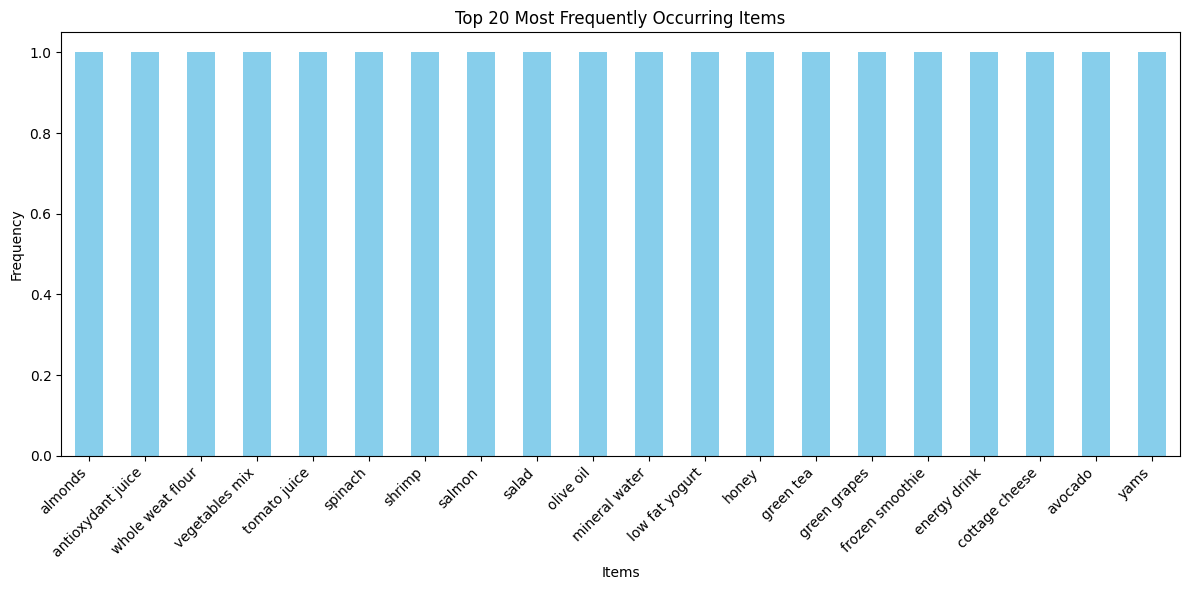

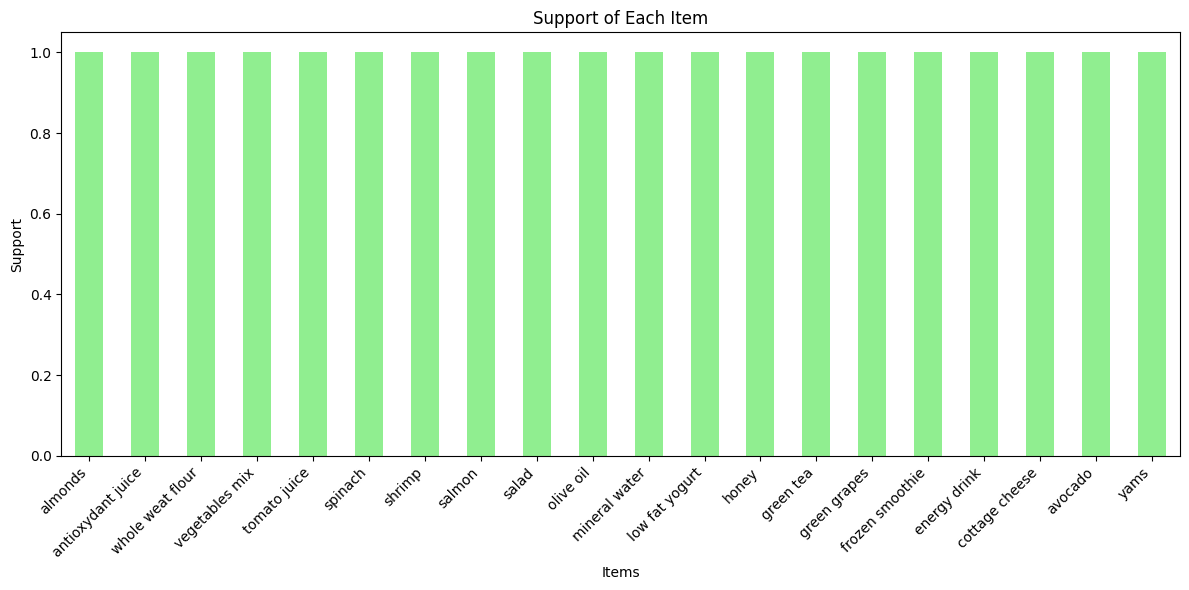

In [7]:
df_copy = df.copy()

df_copy.dropna(inplace=True)

transactions = []
for i in range(len(df_copy)):
    transactions.append([str(df_copy.values[i, j]) for j in range(0, 20)])


item_counts = df_copy.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
item_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequently Occurring Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

item_support = item_counts / len(df_copy)
plt.figure(figsize=(12, 6))
item_support.plot(kind='bar', color='lightgreen')
plt.title('Support of Each Item')
plt.xlabel('Items')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

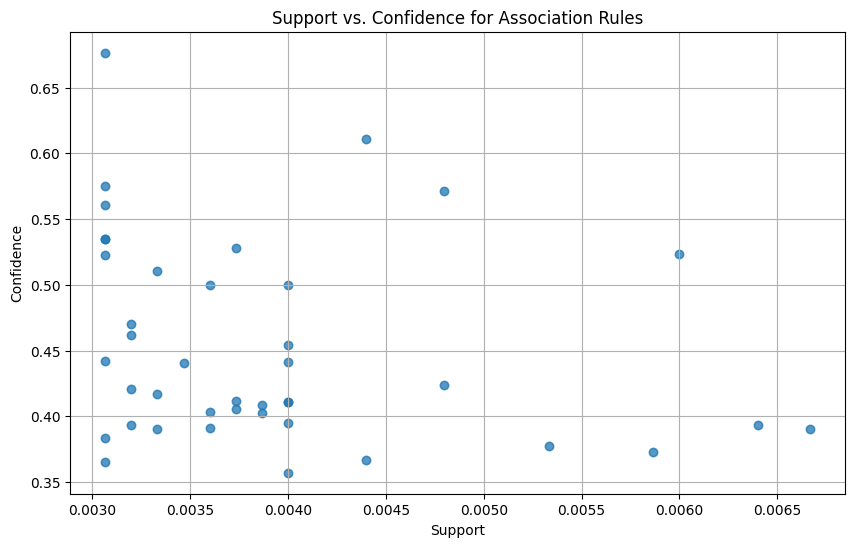

In [14]:
rules = apriori(transactions, min_support=0.003, min_confidence=0.35, min_lift=3, min_length=2)
results = list(rules)


for result in results:
    items = [item for item in result[0]]
    support = result[1]
    confidence = result[2][0][2]
    lift = result[2][0][3]

supports = [result[1] for result in results]
confidences = [result[2][0][2] for result in results]

plt.figure(figsize=(10, 6))
plt.scatter(supports, confidences, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()

In [10]:
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(0, 20)])

min_support = 0.003
min_confidence = 0.35
min_lift = 3
min_length = 2

rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length)
results = list(rules)

for result in results:
    items = [item for item in result[0]]
    support = result[1]
    confidence = result[2][0][2]
    lift = result[2][0][3]
    print(f"Items: {items}, Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")

Items: ['escalope', 'pasta'], Support: 0.0059, Confidence: 0.3729, Lift: 4.7008
Items: ['tomato sauce', 'ground beef'], Support: 0.0053, Confidence: 0.3774, Lift: 3.8407
Items: ['spaghetti', 'avocado', 'milk'], Support: 0.0033, Confidence: 0.4167, Lift: 3.2154
Items: ['tomatoes', 'frozen vegetables', 'cake'], Support: 0.0031, Confidence: 0.3651, Lift: 3.8300
Items: ['cereals', 'ground beef', 'spaghetti'], Support: 0.0031, Confidence: 0.6765, Lift: 3.8853
Items: ['ground beef', 'chicken', 'milk'], Support: 0.0039, Confidence: 0.4085, Lift: 3.1520
Items: ['chicken', 'milk', 'olive oil'], Support: 0.0036, Confidence: 0.5000, Lift: 3.8585
Items: ['herb & pepper', 'ground beef', 'chocolate'], Support: 0.0040, Confidence: 0.4412, Lift: 4.4902
Items: ['soup', 'milk', 'chocolate'], Support: 0.0040, Confidence: 0.3947, Lift: 3.0462
Items: ['cooking oil', 'ground beef', 'spaghetti'], Support: 0.0048, Confidence: 0.5714, Lift: 3.2820
Items: ['eggs', 'spaghetti', 'red wine'], Support: 0.0037, Conf